In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/filtered_data_northern_vietnam.csv')

count    30127.000000
mean         3.705475
std         12.729908
min          0.000000
25%          0.000000
50%          0.000000
75%          0.510000
max        337.820000
Name: PRCP, dtype: float64


<Axes: title={'center': 'PRCP'}, xlabel='[STATION]', ylabel='PRCP'>

<Figure size 800x600 with 0 Axes>

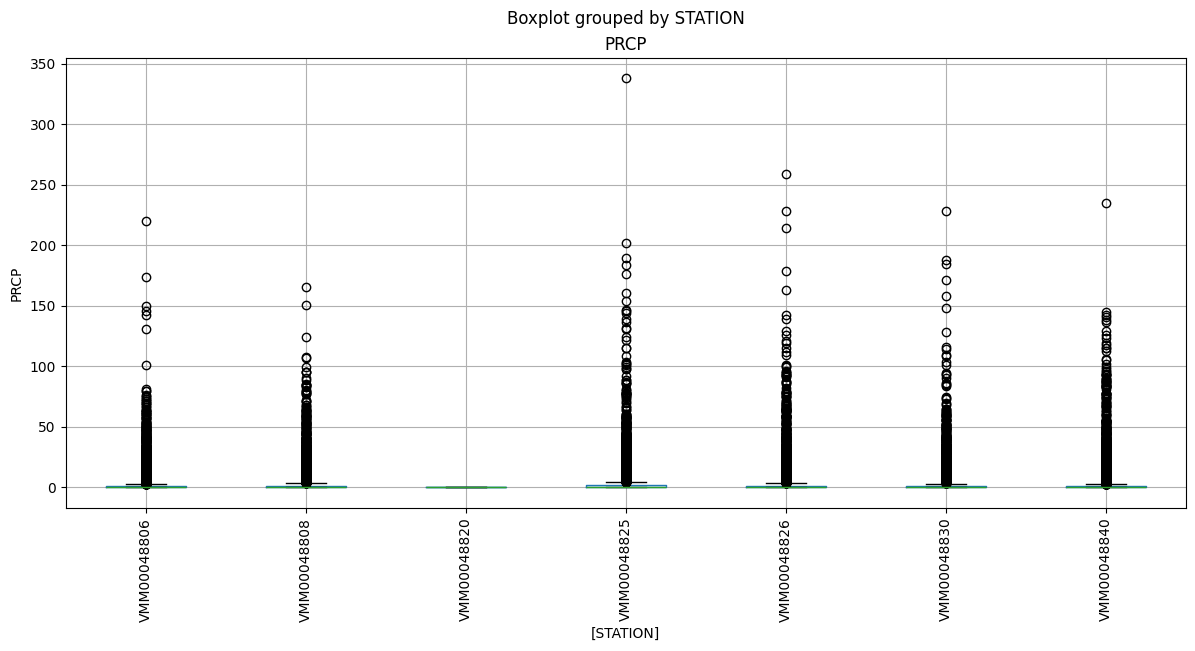

In [20]:
plt.figure(figsize=(8, 6))

print(df['PRCP'].describe())

# Vẽ boxplot cho phân phối lượng mưa
ax = df[['PRCP', 'STATION']].boxplot(by='STATION', figsize=(14, 6))
ax.set_ylabel('PRCP')
plt.xticks(rotation=90)
ax


Nhận xét:

Phần lớn các số liệu được đều là các ngày không có mưa hoặc mưa rất ít, do đó trong 1 số phần phân tích dưới đây, ta chỉ xét những ngày có mưa

Thống kê lượng mưa tổng cộng cho các ngày có mưa:
count    9031.000000
mean       12.361293
std        20.823692
min         0.250000
25%         1.020000
50%         4.060000
75%        14.730000
max       337.820000
Name: PRCP, dtype: float64


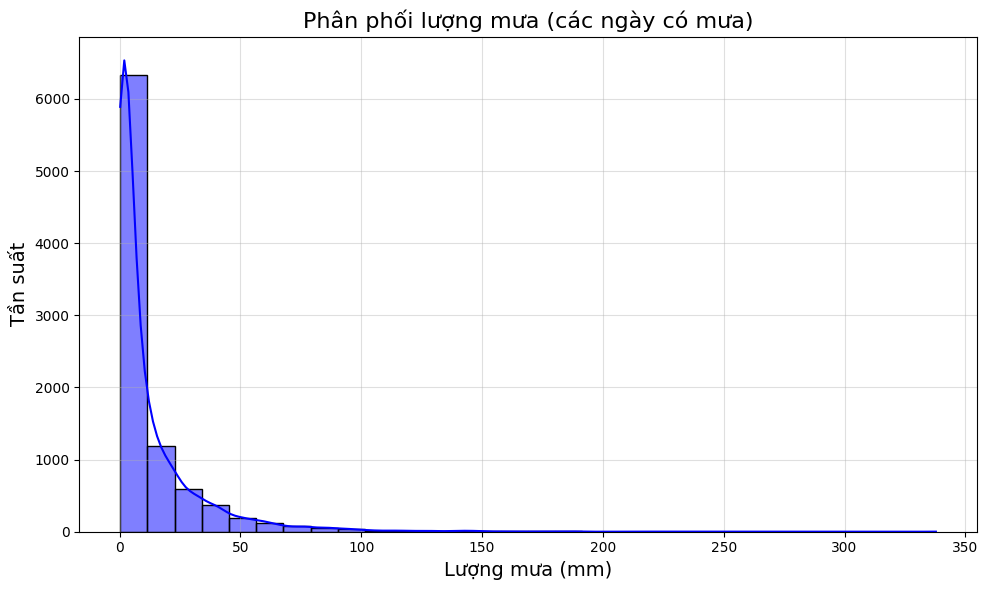

In [21]:
# Lọc những ngày có mưa

df['DATE'] = pd.to_datetime(df['DATE'])
rainy_days = df[df['PRCP'] > 0]

# Kiểm tra thống kê cơ bản sau khi nhóm
print("Thống kê lượng mưa tổng cộng cho các ngày có mưa:")
print(rainy_days['PRCP'].describe())

# ----------------------------------------
# Lập biểu đồ phân phối
# ----------------------------------------
plt.figure(figsize=(10, 6))
sns.histplot(
    rainy_days['PRCP'],
    bins=30,
    kde=True,
    color='blue',  # Màu cho biểu đồ cột
)
plt.title("Phân phối lượng mưa (các ngày có mưa)", fontsize=16)
plt.xlabel("Lượng mưa (mm)", fontsize=14)
plt.ylabel("Tần suất", fontsize=14)
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()


Nhận xét ngay cả khi chỉ xét những ngày có mưa, lượng mưa thông thường vẫn nằm trong khoảng mưa vừa và nhỏ, (<= 50mm)

Tổng lượng mưa hàng năm (dựa trên trung bình hàng ngày):
    YEAR         PRCP
0   2013  2312.976833
1   2014  2264.891333
2   2015  2345.943333
3   2016  2278.526500
4   2017  2350.414667
5   2018  2564.044167
6   2019  2158.661500
7   2020  2040.336833
8   2021  2307.315500
9   2022  2386.161833
10  2023  1947.762333
11  2024  2733.345833


C:\Users\Admin\AppData\Local\Temp\ipykernel_4788\3827157145.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='YEAR', y='PRCP', data=annual_rainfall, palette="Blues_d")


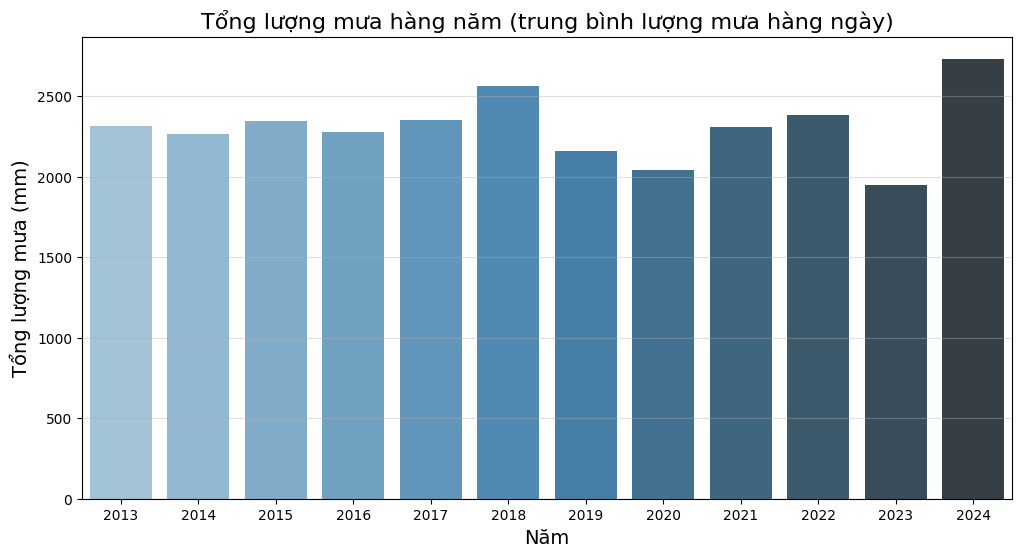

In [22]:
# Nhóm dữ liệu theo ngày và tính trung bình lượng mưa từ các trạm
daily_avg_rainfall = rainy_days.groupby(['DATE', 'MONTH', 'YEAR', 'SEASON'])['PRCP'].mean().reset_index()

# Tính tổng lượng mưa hàng năm
annual_rainfall = daily_avg_rainfall.groupby('YEAR')['PRCP'].sum().reset_index()

# Hiển thị kết quả
print("Tổng lượng mưa hàng năm (dựa trên trung bình hàng ngày):")
print(annual_rainfall)

# ----------------------------------------
# Trực quan hóa tổng lượng mưa hàng năm
# ----------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(x='YEAR', y='PRCP', data=annual_rainfall, palette="Blues_d")
plt.title("Tổng lượng mưa hàng năm (trung bình lượng mưa hàng ngày)", fontsize=16)
plt.xlabel("Năm", fontsize=14)
plt.ylabel("Tổng lượng mưa (mm)", fontsize=14)
plt.grid(axis='y', alpha=0.4)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_4788\3090915844.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_avg_rainfall.groupby(['YEAR', 'SEASON'])['PRCP']


<Figure size 1200x600 with 0 Axes>

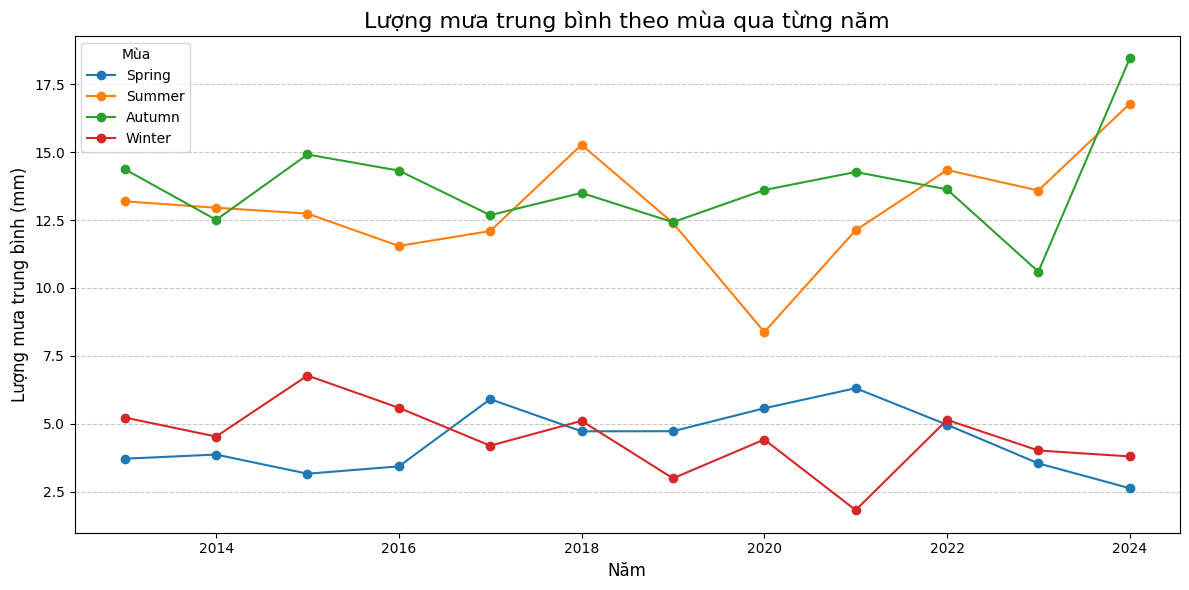

In [23]:
# Đảm bảo cột SEASON có thứ tự logic
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
daily_avg_rainfall['SEASON'] = pd.Categorical(daily_avg_rainfall['SEASON'], categories=season_order, ordered=True)

# Tính lượng mưa trung bình theo mùa từng năm
seasonal_rainfall = (
    daily_avg_rainfall.groupby(['YEAR', 'SEASON'])['PRCP']
    .mean()
    .unstack()
    .reindex(columns=season_order)  # Đảm bảo cột SEASON theo đúng thứ tự
)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
seasonal_rainfall.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Lượng mưa trung bình theo mùa qua từng năm', fontsize=16)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Lượng mưa trung bình (mm)', fontsize=12)
plt.legend(title='Mùa', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


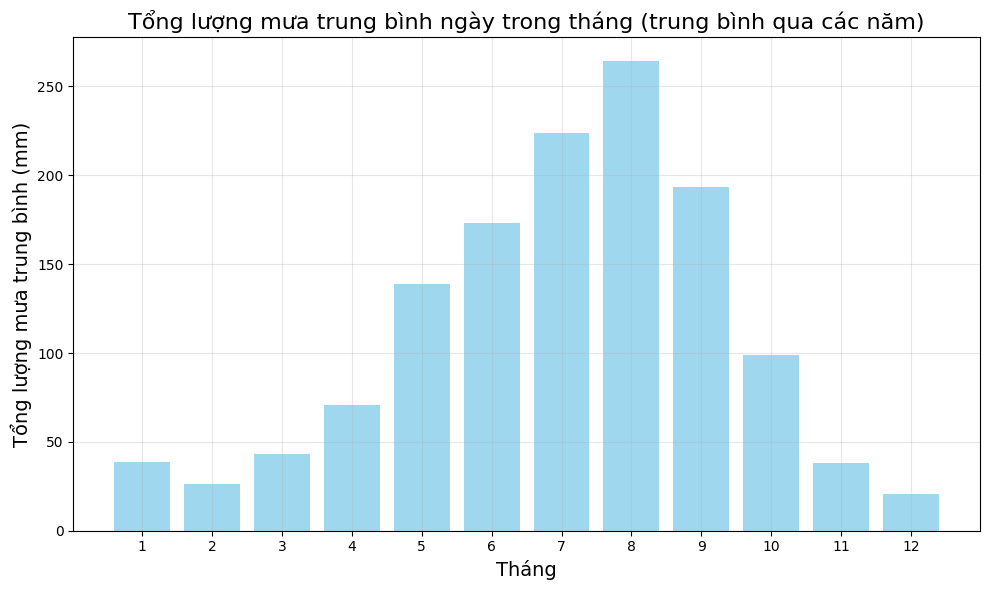

In [24]:
# Tính lượng mưa trung bình ngày (daily_avg)
daily_avg = df.groupby(['DATE', 'YEAR', 'MONTH', 'SEASON'])['PRCP'].mean().reset_index()

# Tính tổng lượng mưa trung bình ngày trong từng tháng của từng năm
monthly_total_avg = daily_avg.groupby(['YEAR', 'MONTH'])['PRCP'].sum().reset_index()

# Tính trung bình tổng lượng mưa hàng tháng qua các năm
monthly_avg_rainfall = monthly_total_avg.groupby('MONTH')['PRCP'].mean().reset_index()

# Đổi tên cột để rõ ràng hơn
monthly_avg_rainfall.columns = ['Month', 'Average Total Rainfall']

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(monthly_avg_rainfall['Month'], monthly_avg_rainfall['Average Total Rainfall'], color='skyblue', alpha=0.8)
plt.title("Tổng lượng mưa trung bình ngày trong tháng (trung bình qua các năm)", fontsize=16)
plt.xlabel("Tháng", fontsize=14)
plt.ylabel("Tổng lượng mưa trung bình (mm)", fontsize=14)
plt.xticks(range(1, 13))  # Hiển thị tháng từ 1 đến 12
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4788\3134732817.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


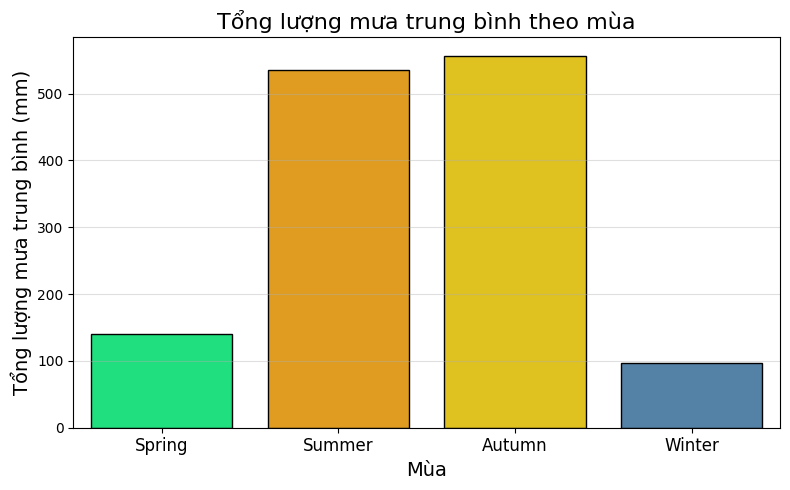

In [25]:
# Tính tổng lượng mưa trung bình ngày trong từng mùa của từng năm
seasonal_total_avg = daily_avg.groupby(['YEAR', 'SEASON'])['PRCP'].sum().reset_index()

# Tính trung bình tổng lượng mưa theo mùa qua các năm
seasonal_avg_rainfall = seasonal_total_avg.groupby('SEASON')['PRCP'].mean().reset_index()

# Đổi tên cột để rõ ràng hơn
seasonal_avg_rainfall.columns = ['Season', 'Average Total Rainfall']

# Thiết lập thứ tự đúng cho mùa
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
seasonal_avg_rainfall['Season'] = pd.Categorical(
    seasonal_avg_rainfall['Season'], categories=season_order, ordered=True
)

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
sns.barplot(
    data=seasonal_avg_rainfall,
    x='Season',
    y='Average Total Rainfall',
    palette=['springgreen', 'orange', 'gold', 'steelblue'],
    edgecolor='black'
)

# Cài đặt biểu đồ
plt.title("Tổng lượng mưa trung bình theo mùa", fontsize=16)
plt.xlabel("Mùa", fontsize=14)
plt.ylabel("Tổng lượng mưa trung bình (mm)", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.grid(axis='y', alpha=0.4)
plt.show()


In [26]:
max_prcp_row = df.loc[df['PRCP'].idxmax()]
print("\nNgày có lượng mưa cao nhất:")
print(max_prcp_row)



Ngày có lượng mưa cao nhất:
DATE       2016-05-25 00:00:00
STATION            VMM00048825
TMAX                       NaN
TMIN                      22.8
TAVG                      28.3
PRCP                    337.82
YEAR                      2016
MONTH                        5
SEASON                  Summer
Name: 9832, dtype: object


In [27]:
rainy_days = df[df['PRCP'] > 0]
rainy_percentage = (len(rainy_days) / len(df)) * 100
print(f"\nTần suất ngày mưa (PRCP > 0): {rainy_percentage:.2f}%")


Tần suất ngày mưa (PRCP > 0): 29.98%
